In [1]:
import math
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 讀取粉絲頁posts
page_id = "crazyck101"

path = page_id+'_post.csv'

In [3]:
df = pd.read_csv(path, encoding = 'utf8')

In [5]:
df = df[(df['num_reactions']!=0) & (df['status_message'].notnull())].reindex()

In [6]:
df

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1021581417961885_1225501984236493,【0319】卡提諾狂新聞 #057\n\n● 重複留言絕對無法抽獎！\n \n※ 第四名由於...,【0319】卡提諾狂新聞 #057,video,https://www.facebook.com/1021581417961885/post...,2017-03-19 19:53:24,50386,8165,10206,41992,329,132,7877,17,39
1,1021581417961885_1225484724238219,20：00 準時更新,NaN,status,https://www.facebook.com/1021581417961885/post...,2017-03-19 19:21:36,7415,265,18,6457,28,56,373,11,490
2,1021581417961885_1225318954254796,我知道你們在等，一有消息我就告訴你們,Timeline Photos,photo,https://www.facebook.com/1021581417961885/post...,2017-03-19 14:54:44,19937,577,38,16649,29,108,1697,39,1415
3,1021581417961885_1224135674373124,委員 請問公蝦小嗎？ #狂阿編\n\n提名投稿狂新聞>> https://goo.gl/lr...,20170317中天新聞 繼林岱樺中油案 綠營再爆陳亭妃涉關說｜卡提諾狂新聞,link,https://www.facebook.com/1021581417961885/post...,2017-03-18 11:22:59,5716,337,276,4421,11,78,741,8,457
4,1021581417961885_1223387294447962,📣小助手來公佈【狂抽猛送 #5】得獎者名單\n本次獎項真的多到不.手.軟\n如果你是以下得...,卡提諾狂新聞,video,https://www.facebook.com/1021581417961885/post...,2017-03-17 17:09:01,986,75,0,910,6,4,4,57,5
5,1021581417961885_1223371937782831,議員您這是何苦 #狂阿編\n\n提名投稿狂新聞>> https://goo.gl/lrVe2h,秘雕哥謝龍介新解9487｜卡提諾狂新聞,link,https://www.facebook.com/1021581417961885/post...,2017-03-17 16:32:22,3837,105,170,3165,17,35,617,2,1
6,1021581417961885_1223331397786885,先來公布吃飯不付錢的客人姓名\n阿不是....是分享那則貼文的得獎人姓名 #小助手\n\n【...,NaN,status,https://www.facebook.com/1021581417961885/post...,2017-03-17 15:14:52,2125,76,20,1905,17,18,128,48,9
7,1021581417961885_1223290171124341,半路撿到的。\n隨地亂丟的人，\n請自己舉手！,Timeline Photos,photo,https://www.facebook.com/1021581417961885/post...,2017-03-17 14:20:04,4389,111,14,4014,8,41,325,0,1
8,1021581417961885_1222523671200991,狂抽猛送#5 抽獎補抽\n加贈 電影票、文具組,狂抽猛送#5 抽獎補抽 加贈 電影票、文具組,video,https://www.facebook.com/1021581417961885/post...,2017-03-16 19:12:58,3638,3433,1204,3260,108,35,118,68,49
9,1021581417961885_1222500434536648,7點直播狂抽猛送抽獎補抽\n和早上答應的電影票跟文具組\n\n現在留言分享還來的及！,Timeline Photos,photo,https://www.facebook.com/1021581417961885/post...,2017-03-16 18:48:42,3615,667,297,3461,9,20,116,6,3


In [7]:
df['datetime'] = df['status_published'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df['weekday'] = df['datetime'].apply(lambda x: x.weekday_name)
df['hour'] = df['datetime'].apply(lambda x:  x.hour)

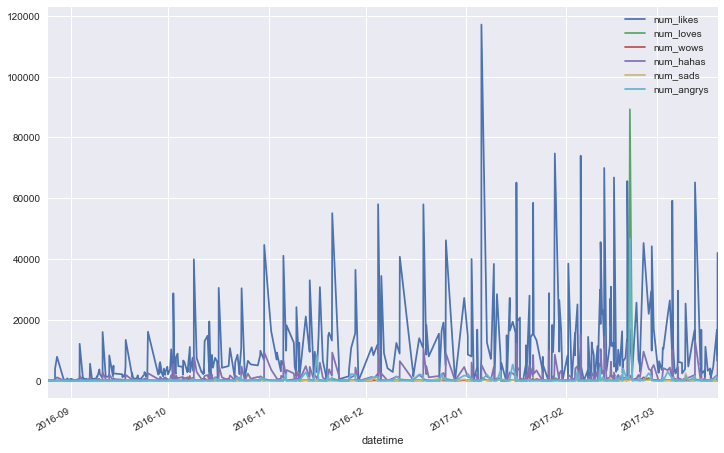

In [9]:
df.plot(x='datetime', y=['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'] ,
       figsize=(12,8))

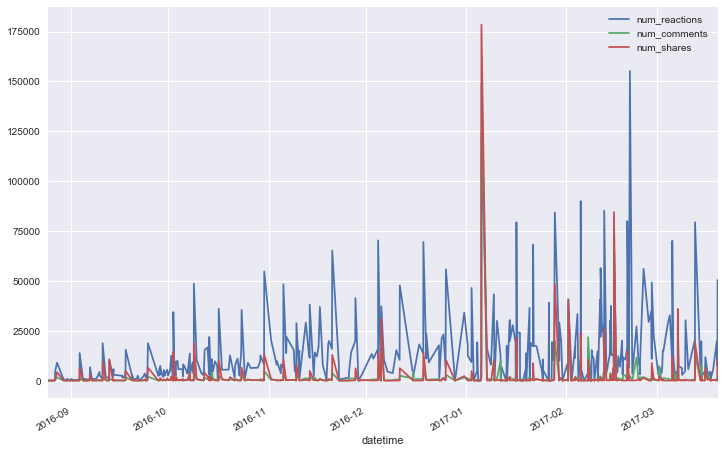

In [10]:
df.plot(x='datetime', y=['num_reactions', 'num_comments', 'num_shares'],
       figsize=(12,8))

In [11]:
def weekday(d):
    list_key = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    list_value = []
    for one in list_key:
        if one in d.keys():
            list_value.append(d[one])
        else:
            list_value.append(0)
    df = pd.DataFrame(index = list_key, data = {'weekday': list_value}).reset_index()
    return df

In [12]:
df_weekday = weekday(dict(df['weekday'].value_counts()))
df_weekday

,index,weekday
0,Monday,48
1,Tuesday,61
2,Wednesday,64
3,Thursday,70
4,Friday,66
5,Saturday,61
6,Sunday,73


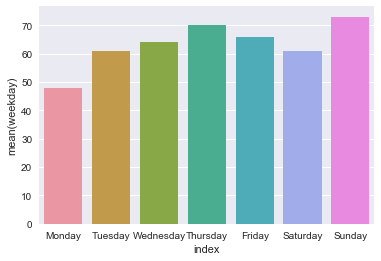

In [13]:
sns.barplot(x='index', y='weekday', data = df_weekday)

In [14]:
def hour(d):
    list_key = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    list_value = []
    for one in list_key:
        if one in d.keys():
            list_value.append(d[one])
        else:
            list_value.append(0)
    df = pd.DataFrame(index = list_key, data = {'hour': list_value}).reset_index()
    return df

In [15]:
df_hour = hour(dict(df['hour'].value_counts()))
df_hour

,index,hour
0,0,9
1,1,9
2,2,8
3,3,1
4,4,2
5,5,1
6,6,5
7,7,7
8,8,10
9,9,12


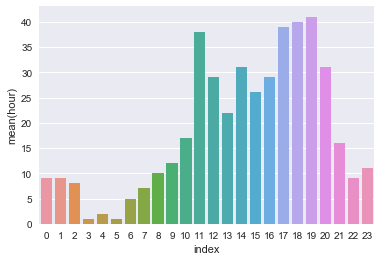

In [16]:
ax = sns.barplot(x='index', y='hour', data = df_hour)

In [17]:

df_status_type = df['status_type'].value_counts().to_frame(name='status_type')
df_status_type

,status_type
link,152
photo,144
video,97
status,50


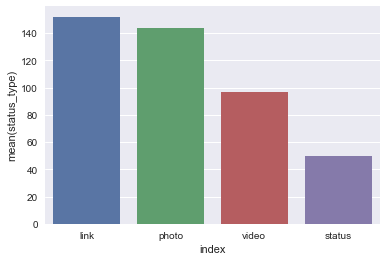

In [18]:
sns.barplot(x='index', y='status_type', data = df_status_type.reset_index())

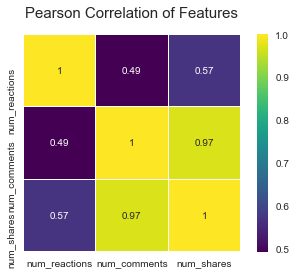

In [19]:
df_tmp = df[['num_reactions', 'num_comments', 'num_shares']]
colormap = plt.cm.viridis
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_tmp.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)